# Table of Contents
* [**Introduction**](#Introduction)
    * [**Singlearity**](#Singlearity)
    * [**Python API**](#Python-API)
    * [**Preparation**](#Preparation)
* [**Initialization**](#Initialization)
* [**Singlearity Data Structures**](#Singlearity-Data-Structures)
    * [**Player**](#Player)
    * [**Team**](#Team)
    * [**Venue**](#Venue)
    * [**State**](#State)
    * [**Atmosphere**](#Atmosphere)
    * [**Matchup**](#Matchup)
* [**Generating Predictions**](#Generating-Predictions)
    * [**Batter vs. Pitcher**](#Batter-vs.-Pitcher)
    * [**Advanced Batter vs. Pitcher Options**](#Advanced-Batter-vs.-Pitcher-Options)   
        * [**Game Date**](#Game-Date)
        * [**Viewing Features**](#Viewing-Features)
    * [**Alternative Models**](#Alternative-Models)   
        * [**ab_woba_no_state Model**](#ab_woba_no_state-Model)
* [**Visualizations**](#Visualizations)       
* [**Game Simulations Using Singlearity-Game**](#Game-Simulations-Using-Singlearity-Game)
        
   

# Introduction

This is a Jupyter Notebook that provides an explanation and tutorial on the [Singlearity](https://www.singlearity.com) baseball analytics service.  Please see [this tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) for a good explanation about how to use Jupyter Notebooks.

## Singlearity

Singlearity is a web-based service for baseball analytics.  It uses machine learning to make predictions based on a wide range of player and historical data.    These predictions can be used to make more effective pre-game and in-game strategy decisions and to provide for more accurate game simulations.

This work was presented at the 2021 SABR Conference and the 2021 Sloan Sports Analytics Conference.   You can view the [technical paper](https://www.singlearity.com/static/assets/sloan-singlearity.pdf) or the [Powerpoint presentation](https://www.singlearity.com/static/assets/Singlearity-sabr.pptx).

You can also view an earlier article about Singlearity that appeared on [Baseball Prospectus](https://www.baseballprospectus.com/news/article/59993/singlearity-using-a-neural-network-to-predict-the-outcome-of-plate-appearances/).


## Python API

The goal of this workbook is to demonstrate the usage of the Singlearity Python API.  While it is possible to access Singlearity using direct HTTP requests, using a client library handles the low-level communication, allowing you and easy way to write more readable and compact code.   

There are two additional places to get help with the Python APIs:
1. The [Singlearity examples](https://github.com/singlearity-sports/singlearity-python/tree/master/examples) directory contains an extensive list of examples.
1. The automatically generated [Swagger documents](https://www.singlearity.com/docs) contain a comprehensive list of API arguments.

If you are interested in accessing Singlearity through the <code>R</code> programming language, you can view our [main github page](https://github.com/singlearity-sports) to view our APIs in different programming languages.

## Preparation

This has been tested on Python 3.7, but everything should work with other versions of Python 3+.   

1. Install packages:

<code>pip install singlearity pandas seaborn matplotlib</code>

2. Obtain a free trial of the Singlearity API key by going to (www.singlearity.com) and clicking on the "Contact" link.

# Initialization

To start things off, we need to set up our API key, import some types, and initialize our library.

In [1]:
import singlearity
from singlearity import State, Player, Team, Venue, Atmosphere, Matchup, ApiException, LineupPos, Lineup, Game
from singlearity.rest import ApiException
import pandas as pd
import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
configuration = singlearity.Configuration()
configuration.host = os.environ.get("SINGLEARITY_API_SERVER", "https://api.singlearity.com")
configuration.api_key['SINGLEARITY_API_KEY']='<YOUR_API_KEY>'

# Enter a context with an instance of the API client
with singlearity.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    sing = singlearity.APIsApi(api_client)
    
    #validate that we can connect to the singelarity server
    print(sing.hello())
    
    #validate that our key works
    print(sing.hello_with_key())


Hello from Singlearity!!!
Hello from Singlearity.  Your key looks good!!!


# Singlearity Data Structures

## Player

The Player object contains information about a single player.   It is created through a call to 
<code>get_players()</code>.  

<code>get_players()</code> takes a wide range of arguments that can be used to get the players meeting particular criteria.  It returns a list of <code>Player</code> objects.  The Singlearity database contains all players who have appeared in a major league game in the last 10 years, and it is updated daily.

In [2]:
smith_players = sing.get_players(name='Smith')

print(f"There are a lot of players named Smith.  Here are the first 10.")
print(smith_players[0:min(len(smith_players), 10)])


There are a lot of players named Smith.  Here are the first 10.
[{'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1990-04-12',
 'current_age': 31,
 'debut_date': '2013-05-11',
 'full_name': 'Burch Smith',
 'mlb_id': 572143,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/572143.jpg',
 'pitch_hand': 'R',
 'position': 'P',
 'team_abbrev': 'OAK',
 'team_id': 133}, {'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1991-07-28',
 'current_age': 29,
 'debut_date': '2017-07-17',
 'full_name': 'Caleb Smith',
 'mlb_id': 592761,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/592761.jpg',
 'pitch_hand': 'L',
 'position': 'P',
 'team_abbrev': 'ARI',
 'team_id': 109}, {'active': True,
 'bat_side': 'L',
 'birth_country': 'USA',
 'birth_date': '1995-06-15',
 'current_age': 25,
 'debut_date': '2017-08-11',
 'full_name': 'Dominic Smith',
 'mlb_id': 642086,
 'photo_url': 'https://securea.mlb.com/mlb/images/playe

If multiple arguments are provided to <code>get_players()</code>, the function returns the players satisfying **all** the specified conditions.

Let's get a list of players named Smith who meet additional criteria.

In [3]:
print(sing.get_players(name='Smith', age_min=22, bat_side='R', on_40=True ))

[{'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1990-04-12',
 'current_age': 31,
 'debut_date': '2013-05-11',
 'full_name': 'Burch Smith',
 'mlb_id': 572143,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/572143.jpg',
 'pitch_hand': 'R',
 'position': 'P',
 'team_abbrev': 'OAK',
 'team_id': 133}, {'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1991-07-28',
 'current_age': 29,
 'debut_date': '2017-07-17',
 'full_name': 'Caleb Smith',
 'mlb_id': 592761,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/592761.jpg',
 'pitch_hand': 'L',
 'position': 'P',
 'team_abbrev': 'ARI',
 'team_id': 109}, {'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1984-03-22',
 'current_age': 37,
 'debut_date': '2007-04-01',
 'full_name': 'Joe Smith',
 'mlb_id': 501925,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/501925.jpg',
 'pitch_hand': 'R',
 'position': 'P',
 'te

This example retrieves right-handed pitchers on a specific team.

In [4]:
print(sing.get_players(team_name='Yankees', position='P', pitch_hand='R', on_40=True))

[{'active': True,
 'bat_side': 'R',
 'birth_country': 'Dominican Republic',
 'birth_date': '1995-09-26',
 'current_age': 25,
 'debut_date': '2020-08-08',
 'full_name': 'Albert Abreu',
 'mlb_id': 656061,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/656061.jpg',
 'pitch_hand': 'R',
 'position': 'P',
 'team_abbrev': 'NYY',
 'team_id': 147}, {'active': True,
 'bat_side': 'R',
 'birth_country': 'Mexico',
 'birth_date': '1992-04-25',
 'current_age': 29,
 'debut_date': '2016-04-08',
 'full_name': 'Luis Cessa',
 'mlb_id': 570666,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/570666.jpg',
 'pitch_hand': 'R',
 'position': 'P',
 'team_abbrev': 'NYY',
 'team_id': 147}, {'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1990-09-08',
 'current_age': 30,
 'debut_date': '2013-06-11',
 'full_name': 'Gerrit Cole',
 'mlb_id': 543037,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/543037.jpg',
 'pitch_hand': 'R',
 '

The most reliable way to retrieve a player is to use his <code>mlb_id</code>.  This avoids conflicts with two players having the same name (e.g. Will Smith).  It also avoids issues around player names being slightly different in different databases (e.g. Matthew Boyd vs. Matt Boyd)

Note that <code>get_players()</code> always returns a list so you need to extract the 1st player from the list using the <code>[]</code> notation.

In [5]:
print(f"This is a pretty good player:\n{sing.get_players(id=545361)[0]}")

This is a pretty good player:
{'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1991-08-07',
 'current_age': 29,
 'debut_date': '2011-07-08',
 'full_name': 'Mike Trout',
 'mlb_id': 545361,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/545361.jpg',
 'pitch_hand': 'R',
 'position': 'CF',
 'team_abbrev': 'LAA',
 'team_id': 108}


## Team

A Team object is retrieved through <code>get_teams()</code>.   

In [6]:
all_teams = sing.get_teams()
print(f"There are {len(all_teams)} in major league baseball")

new_york_teams = sing.get_teams(name='New York')
print(f"There are {len(new_york_teams)} New York teams")

print(f"The Yankees team is:\n{sing.get_teams(name='Yankees')[0]}")

There are 30 in major league baseball
There are 2 New York teams
The Yankees team is:
{'abbreviation': 'NYY',
 'division': 'American League East',
 'id': 147,
 'league': 'American League',
 'name': 'New York Yankees',
 'team_name': 'Yankees',
 'venue': {'home_team_abbrev': 'NYY',
           'home_team_id': 147,
           'id': 3313,
           'name': 'Yankee Stadium'}}


## Venue

A Venue object is retrieved through a call to </code>get_venues()</code>.  You can retrieve the venue by passing in either the stadium name (partial names are ok) or the team name.


In [7]:
yankee_stadium = sing.get_venues(stadium_name='Yankee Stadium')[0]
print(f"Yankee stadium is:\n{yankee_stadium}")

print(f"The Dodger home field is:\n{sing.get_venues(team_name='Dodgers')[0]}")

Yankee stadium is:
{'home_team_abbrev': 'NYY',
 'home_team_id': 147,
 'id': 3313,
 'name': 'Yankee Stadium'}
The Dodger home field is:
{'home_team_abbrev': 'LAD',
 'home_team_id': 119,
 'id': 22,
 'name': 'Dodger Stadium'}


## State

A State object allows you to create an object representing the state of the game. A default state object will contain the state at the beginning of a game.  Be careful about using default state arguments because matchups with fresh pitchers and no runners on base tend to favor the pitcher.

In [8]:
state_beginning = State()
print(f"A State object with no arguments is:\n{state_beginning}")


A State object with no arguments is:
{'bat_lineup_order': 1,
 'bat_score': 0,
 'fld_lineup_order': 1,
 'fld_score': 0,
 'frame_runs_scored': 0,
 'inning': 1,
 'on_1b': False,
 'on_2b': False,
 'on_3b': False,
 'outs': 0,
 'pitch_number': 0,
 'top': True}


In [9]:
exciting_state = State(on_1b=True, on_2b=True, on_3b=True, 
                       inning=5, outs=2, top=False, bat_score=3, fld_score=3, 
                       pitch_number=85)
print(exciting_state)

{'bat_lineup_order': 1,
 'bat_score': 3,
 'fld_lineup_order': 1,
 'fld_score': 3,
 'frame_runs_scored': 0,
 'inning': 5,
 'on_1b': True,
 'on_2b': True,
 'on_3b': True,
 'outs': 2,
 'pitch_number': 85,
 'top': False}


## Atmosphere

An atmosphere object stores information about the playing conditions, including the game location and the weather. 

In [10]:
atmosph = Atmosphere(venue=sing.get_venues(stadium_name='Yankee Stadium')[0],
                     home_team = sing.get_teams(name='Yankees')[0],
                     temperature = 84)
print(atmosph)

{'home_team': {'abbreviation': 'NYY',
               'division': 'American League East',
               'id': 147,
               'league': 'American League',
               'name': 'New York Yankees',
               'team_name': 'Yankees',
               'venue': {'home_team_abbrev': 'NYY',
                         'home_team_id': 147,
                         'id': 3313,
                         'name': 'Yankee Stadium'}},
 'temperature': 84,
 'venue': {'home_team_abbrev': 'NYY',
           'home_team_id': 147,
           'id': 3313,
           'name': 'Yankee Stadium'}}


## Matchup

In order to predict the results of a batter-vs-pitcher matchup, you must create a Matchup.   
A matchup consists of the following elements:
* Batter
* Pitcher
* Atmosphere
* State

In [11]:

trout_vs_cole = Matchup(
    batter=sing.get_players(name='Mike Trout')[0]
    ,pitcher=sing.get_players(name='Gerrit Cole')[0]
    ,atmosphere=atmosph
    ,state=exciting_state
)

print(trout_vs_cole)

{'atmosphere': {'home_team': {'abbreviation': 'NYY',
                              'division': 'American League East',
                              'id': 147,
                              'league': 'American League',
                              'name': 'New York Yankees',
                              'team_name': 'Yankees',
                              'venue': {'home_team_abbrev': 'NYY',
                                        'home_team_id': 147,
                                        'id': 3313,
                                        'name': 'Yankee Stadium'}},
                'temperature': 84,
                'venue': {'home_team_abbrev': 'NYY',
                          'home_team_id': 147,
                          'id': 3313,
                          'name': 'Yankee Stadium'}},
 'batter': {'active': True,
            'bat_side': 'R',
            'birth_country': 'USA',
            'birth_date': '1991-08-07',
            'current_age': 29,
            'debut_date': '201

# Generating Predictions

## Batter vs. Pitcher

The <code>get_pa_sim()</code> function is used to retrieve Singlearity predictions for batter-vs-pitcher matchups.  It takes a list of Matchup objects along with some optional arguments and generates predictions about the results of the matchups.  

In [12]:
results = pd.DataFrame(sing.get_pa_sim([trout_vs_cole]))
print(results)

print(f"Expected woba is {results.iloc[0]['woba_exp']}")

   batter  pitcher batter_name pitcher_name  outs  inning  p_pitch_no  on_1b  \
0  545361   543037  Mike Trout  Gerrit Cole     2       5          85      1   

   on_2b  on_3b    bb_exp    ci_exp  double_exp        dp_exp     e_exp  \
0      1      1  0.122239  0.000282    0.040052  1.427640e-31  0.004002   

   f_out_exp    fc_exp  fc_o_exp    fo_exp       gdp_exp   hbp_exp    hr_exp  \
0   0.330234  0.000074  0.000017  0.018168  7.819466e-28  0.016729  0.051153   

    ibb_exp        sf_exp     sf_dp_exp        sh_exp  single_exp    so_exp  \
0  0.007742  9.703545e-18  2.415579e-25  1.374804e-15     0.08448  0.321226   

      so_dp_exp        tp_exp  triple_exp    ba_exp  obp_exp   slg_exp  \
0  6.055209e-32  1.607345e-23    0.003602  0.210182  0.32609  0.445486   

    ops_exp  woba_exp  
0  0.771576   0.33115  
Expected woba is 0.33114988821146335


It's possible to create predictions for multiple matchups using a single call to <code>get_pa_sim()</code>.  Using multiple matchups in a single call to <code>get_pa_sim()</code> is significantly faster making multiple calls to <code>get_pa_sim()</code>.    You can generate predictions for up to 500 matchups in just a few seconds.

In [13]:
#let's look at how we can create multiple matchups 
candidate_pitchers=sing.get_players(team_name='Angels',on_40=True, position='P')
matchups = [Matchup(
    batter=sing.get_players(name='Aaron Judge')[0]
    ,pitcher=p
    ,atmosphere=atmosph
    ,state=State(inning=9, top=False, 
                 bat_score=3, fld_score=3, 
                 on_1b=True, on_2b=True, on_3b=True,
                 outs=2)
    ) for p in candidate_pitchers]
results = pd.DataFrame(sing.get_pa_sim(matchups)).sort_values(by=['obp_exp'])
results['Hold Percentage'] = results['obp_exp'].map(lambda n: '{:.2%}'.format(1-n))

print(f"Best pitcher to face Aaron Judge with the game on the line:\n{results[['pitcher_name','Hold Percentage']]}")

Best pitcher to face Aaron Judge with the game on the line:
        pitcher_name Hold Percentage
9        Dylan Bundy          71.31%
6      Andrew Heaney          70.88%
11        James Hoyt          70.58%
12   Raisel Iglesias          70.36%
8        Mike Mayers          69.96%
17     Shohei Ohtani          69.60%
16   Griffin Canning          69.42%
5         Felix Pena          68.42%
21   Chris Rodriguez          68.05%
4       Steve Cishek          67.98%
10        Ty Buttrey          67.83%
0      Junior Guerra          67.59%
2      Jose Quintana          67.18%
1        Tony Watson          66.98%
3          Alex Cobb          66.47%
13     Aaron Slegers          65.90%
14      Jaime Barria          65.87%
7       Alex Claudio          65.06%
20       Kyle Keller          64.51%
15      Jose Quijada          64.33%
19  Patrick Sandoval          64.18%
18       Jose Suarez          61.23%


Here is a different example that shows how different Angels batters are expected to do against different Yankee pitchers with one out in the top of the 3rd inning.

In [14]:
candidate_batters = [b for b in sing.get_players(team_name='Angels', on_40=True) if b.position!='P']
candidate_pitchers = [b for b in sing.get_players(team_name='Yankees', on_40=True)]
matchups = ([Matchup(batter = m, pitcher = p, 
        atmosphere = atmosph, state=State(on_1b=True, outs=1, inning=3, top=True)) for m in candidate_batters[0:15] for p in candidate_pitchers[0:10]])
results = pd.DataFrame(sing.get_pa_sim(matchups))
print(f"Results:\n{results[['batter_name', 'pitcher_name','hr_exp','gdp_exp', 'ba_exp','woba_exp']]}")

Results:
         batter_name     pitcher_name    hr_exp   gdp_exp    ba_exp  woba_exp
0      Phil Gosselin    Brett Gardner  0.024981  0.110250  0.276307  0.325920
1        Jared Walsh    Brett Gardner  0.040802  0.092008  0.272393  0.339922
2        Kurt Suzuki    Brett Gardner  0.037181  0.131697  0.283792  0.351886
3         Jose Rojas    Brett Gardner  0.043274  0.084288  0.248178  0.318430
4            Jon Jay    Brett Gardner  0.006833  0.119332  0.266832  0.289446
5       Justin Upton    Brett Gardner  0.052331  0.085142  0.260589  0.355439
6         Max Stassi    Brett Gardner  0.033237  0.111211  0.237727  0.307689
7        Drew Butera    Brett Gardner  0.030087  0.115922  0.247002  0.304721
8     David Fletcher    Brett Gardner  0.008857  0.130410  0.319565  0.344969
9      Jose Iglesias    Brett Gardner  0.019326  0.127786  0.310307  0.341670
10        Mike Trout    Brett Gardner  0.066622  0.065563  0.293819  0.415128
11      Luis Rengifo    Brett Gardner  0.017471  0.0972

## Advanced Batter vs. Pitcher Options

### Game Date

By default, Singlearity will assume that you are generating predictions for a game taking place today.  For evaluation purposes, you may want to examine the predicitons from a previous date.  To do this, create new matchups using a <code>date</code> argument.  Note that all matchups for a call to <code>get_pa_sim()</code> must use the same date.

In [15]:
trout_vs_cole = Matchup(
    batter=sing.get_players(name='Mike Trout')[0]
    ,pitcher=sing.get_players(name='Gerrit Cole')[0]
    ,atmosphere=atmosph
    ,state=exciting_state
    ,date='2019-08-14'
)

results = pd.DataFrame(sing.get_pa_sim([trout_vs_cole]))
print(results)

   batter  pitcher batter_name pitcher_name  outs  inning  p_pitch_no  on_1b  \
0  545361   543037  Mike Trout  Gerrit Cole     2       5          85      1   

   on_2b  on_3b    bb_exp    ci_exp  double_exp        dp_exp     e_exp  \
0      1      1  0.149756  0.000356    0.043311  2.140429e-34  0.004201   

   f_out_exp    fc_exp  fc_o_exp    fo_exp       gdp_exp   hbp_exp   hr_exp  \
0   0.352173  0.000044  0.000015  0.021903  1.599213e-30  0.015279  0.04974   

    ibb_exp        sf_exp     sf_dp_exp        sh_exp  single_exp    so_exp  \
0  0.007644  2.691723e-19  1.209739e-25  1.450196e-16    0.089422  0.262983   

      so_dp_exp        tp_exp  triple_exp    ba_exp   obp_exp   slg_exp  \
0  4.599240e-34  1.079995e-23    0.003173  0.224491  0.358453  0.464982   

    ops_exp  woba_exp  
0  0.823435  0.348963  


### Viewing Features

You may be interested in viewing and understanding which features(aka inputs) were used by the model to make its predictions.  Use the <code>return_features</code> argument to view the features.

In [16]:
results = pd.DataFrame(sing.get_pa_sim([trout_vs_cole], return_features=True))
print(results)

   batter  pitcher batter_name pitcher_name  outs  inning  p_pitch_no  on_1b  \
0  545361   543037  Mike Trout  Gerrit Cole     2       5          85      1   

   on_2b  on_3b    bb_exp    ci_exp  double_exp        dp_exp     e_exp  \
0      1      1  0.149756  0.000356    0.043311  2.140429e-34  0.004201   

   f_out_exp    fc_exp  fc_o_exp    fo_exp       gdp_exp   hbp_exp   hr_exp  \
0   0.352173  0.000044  0.000015  0.021903  1.599213e-30  0.015279  0.04974   

    ibb_exp        sf_exp     sf_dp_exp        sh_exp  single_exp    so_exp  \
0  0.007644  2.691723e-19  1.209739e-25  1.450196e-16    0.089422  0.262983   

      so_dp_exp        tp_exp  triple_exp    ba_exp   obp_exp   slg_exp  \
0  4.599240e-34  1.079995e-23    0.003173  0.224491  0.358453  0.464982   

    ops_exp  woba_exp  PREDICTIVE_DATA_b_21_pa  \
0  0.823435  0.348963                     86.0   

   PREDICTIVE_DATA_b_21_single_per_pa  PREDICTIVE_DATA_b_21_double_per_pa  \
0                            0.069767    

## Alternative Models

The default model, "ab_outcome", for predictions generates predictive outcomes for 21 different plate appearance outcomes (e.g. single, strikeout, field out).  It then calculates aggregated stats (e.g. OBP, SLG, wOBA) based on the probabilities of these 21 different outcomes.   

### ab_woba_no_state Model

Sometimes, it is desirable to generate a batter-vs-pitcher prediction without knowing in advance the situation (i.e. State) in which they will face each other.  One possibility is to use the "ab_outcome" model with a default State. However, this prediction will favor the defense as it assumes a fresh pitcher and no runners on base.

An alternative approach is to use a different model, called "ab_woba_no_state".  This model generates predictions for wOBA that assume "typical" game states.   This may more accurately model the batter vs. pitcher matchup over the course of a game or season.

In [17]:
results = pd.DataFrame(sing.get_pa_sim([trout_vs_cole], model_name='ab_woba_no_state'))
print(results)

   batter  pitcher batter_name pitcher_name  outs  inning  p_pitch_no  on_1b  \
0  545361   543037  Mike Trout  Gerrit Cole     2       5          85      1   

   on_2b  on_3b  woba_exp  
0      1      1  0.410044  


# Visualizations

Singlearity can be combined with tools such as pyplot and seaborn to generate more visually appealing results.  This example plots the expected wOBA and DP and HR percentages when different Angels batters face different Yankees pitchers with a runner on 1st and no outs.

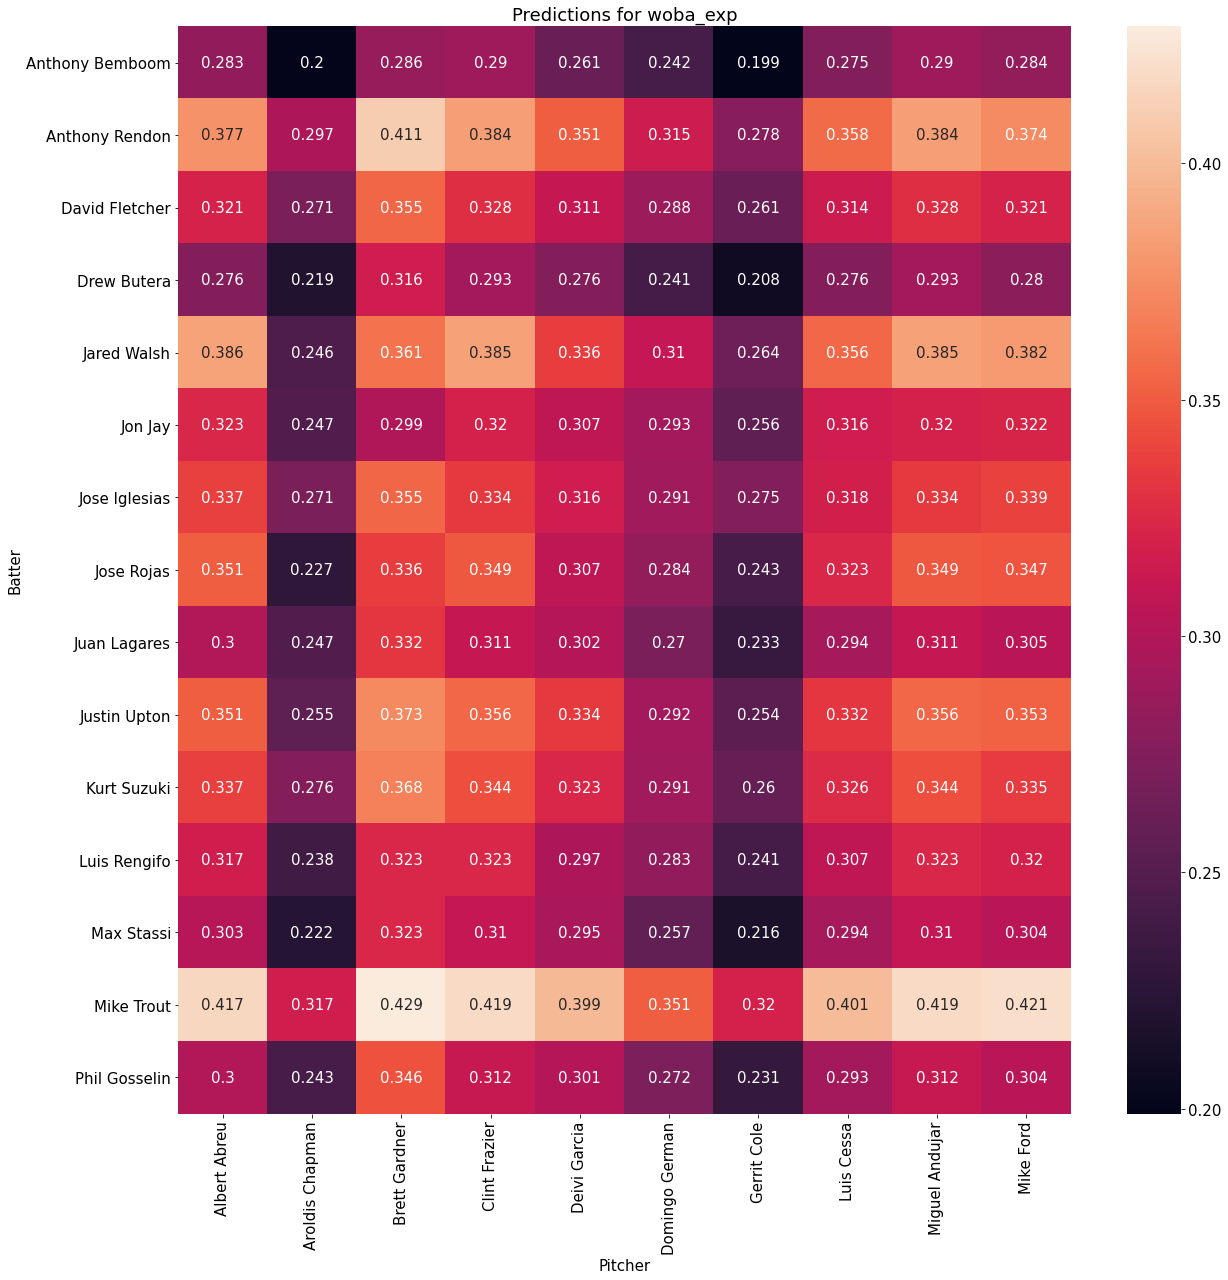

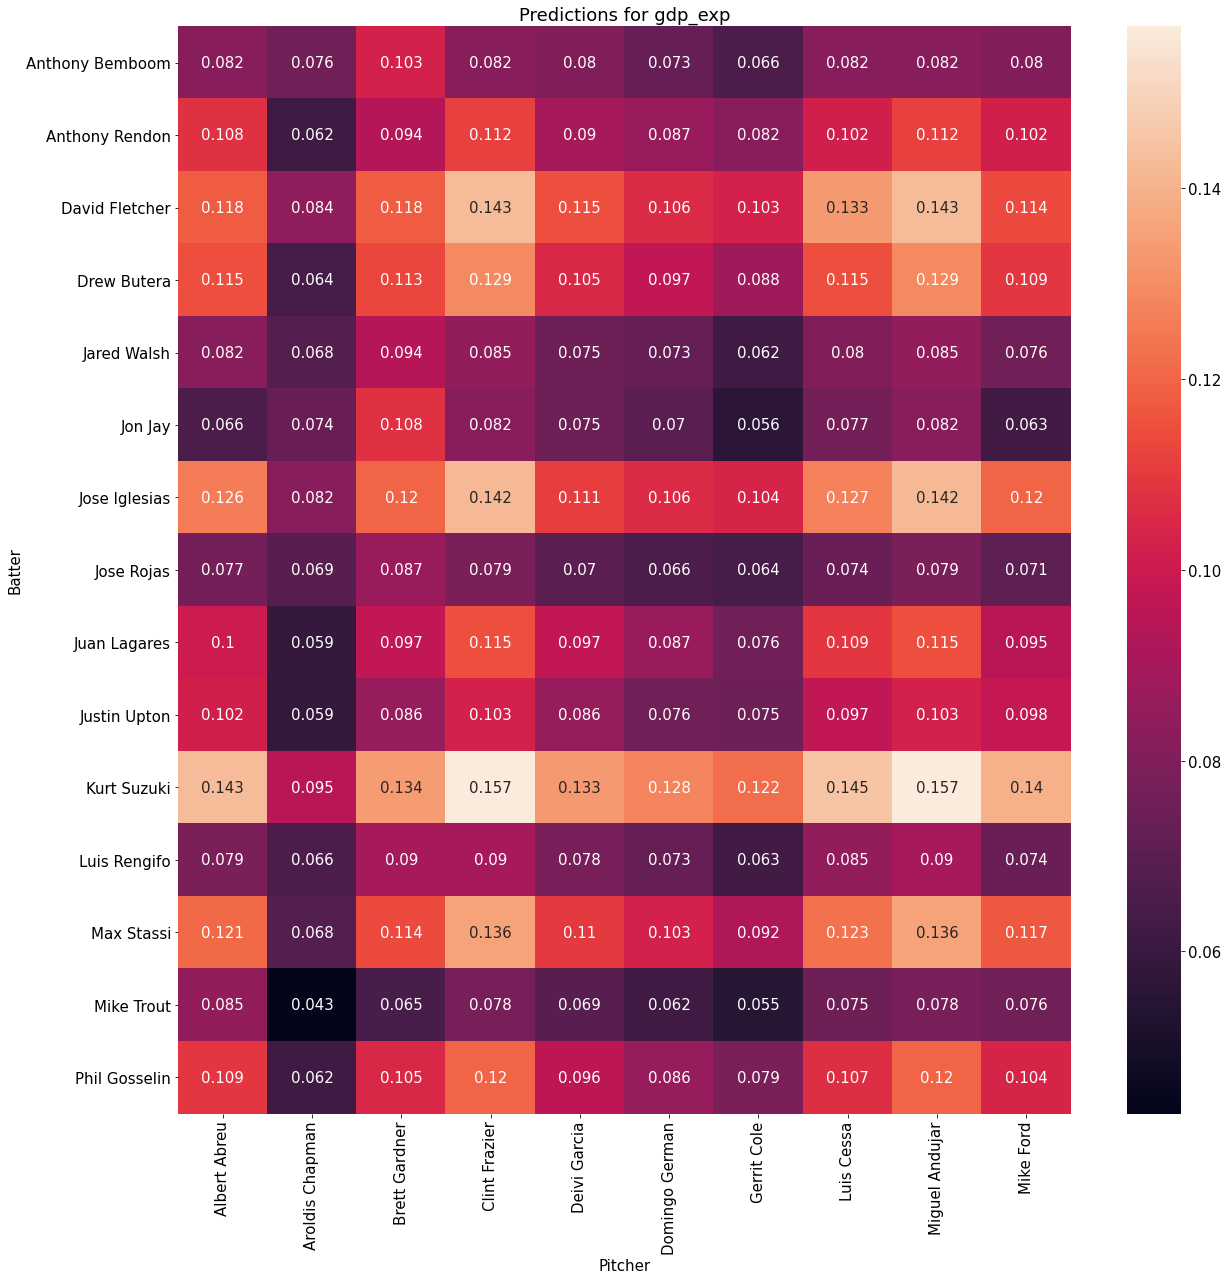

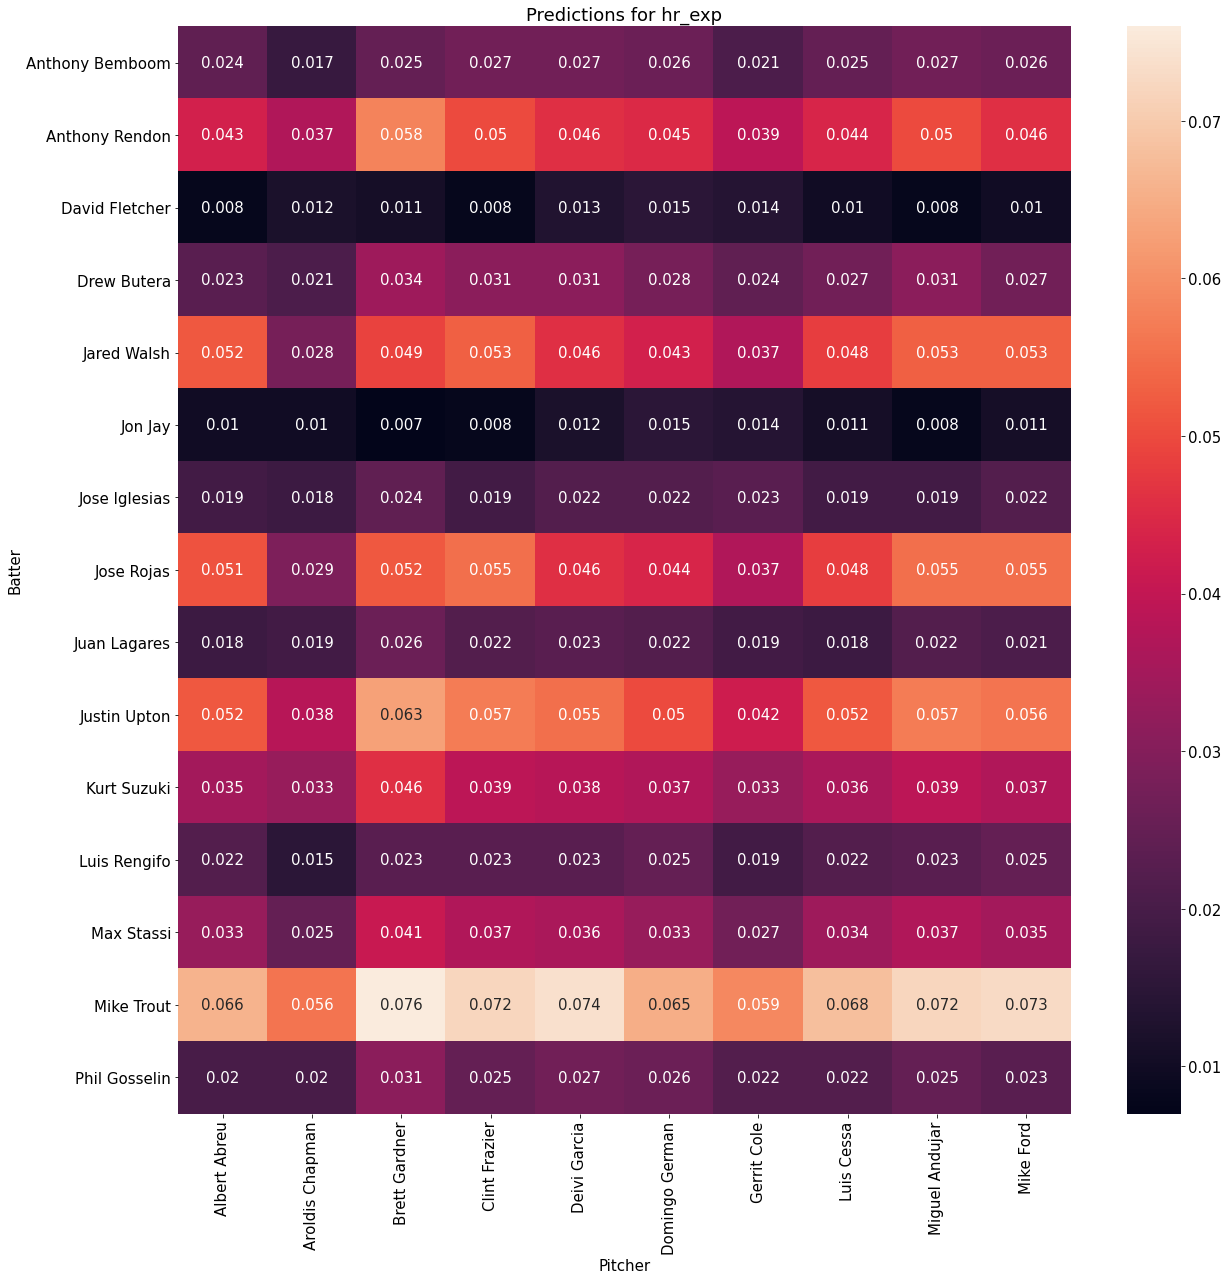

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

def plot_results(df, keys):
    
    if keys is None: 
        return
    for key in keys:
        df[key] = pd.Series([float("{0:.3f}".format(float(val * 1))) for val in df[key]], index = df.index)
        df_pivot = df.pivot(index='batter_name', columns='pitcher_name', values=key)
        plt.figure(figsize=(20, 20))
        plt.rcParams.update({'font.size': 15})
        sns.heatmap(df_pivot, annot=True, fmt='g')
        plt.title(f'Predictions for {key}', wrap=True)
        plt.xlabel('Pitcher')
        plt.ylabel('Batter')
        plt.yticks(rotation=0)
        plt.show();
    
candidate_batters = [b for b in sing.get_players(team_name='Angels', on_40=True) if b.position!='P']
candidate_pitchers = [b for b in sing.get_players(team_name='Yankees', on_40=True)]
#evaluate the first group of batters against the first group of pitchers
matchups = ([Matchup(batter = m, pitcher = p, 
        atmosphere = atmosph, state=State(on_1b=True)) for m in candidate_batters[0:15] for p in candidate_pitchers[0:10]])
results = pd.DataFrame(sing.get_pa_sim(matchups))    
plot_results(results, ['woba_exp', 'gdp_exp', 'hr_exp'])
    
    

# Game Simulations Using Singlearity-Game

Singlearity-Game is a model which uses the Singlearity plate appearance predictions to create hundreds or thousands of Monte Carlo simulations using the plate appearance outcomes provided by Singlearity. 

To generate game simulations, you must programmatically create home and away Lineups. The simulation may optionally include a starting State at some intermediate point in the game. This would allow you to simulate, for instance, a tie game in the bottom of the 9th inning game with multiple runners on base, the 5th hitter coming to bat with a tired pitcher on the mound. Currently, Singlearity only supports simulating to the end of the half-inning. With a very short piece of code, you could, for instance, simulate how successful each of ten different relievers would be in holding a lead in the bottom of the 10th inning when facing a given portion of the lineup. It is possible to accurately simulate hundreds or thousands of games in just a few seconds.

**Note: Going forward, we believe Markov-chain based simulation is a more accurate way to model half innings and so Singlearity-Game will be replaced by Singlearity-Markov which is available in R [here](https://github.com/singlearity-sports/singlearity-R/tree/master/markov). There is no Python version of Singlearity-Markov at this time.  See [this paper](https://www.singlearity.com/static/assets/sloan-singlearity.pdf) for an extensive discussion and analysis of using Markov chains for predictions.**

Evaluating 10 pitchers

Finding the best closer by simulating 100 innings
here
Pitcher: Albert Abreu         Lineup Start: 1 Save Percentage: 48.0% Loss Percentage: 22.0%  Tie Percentage: 30.0%
Pitcher: Luis Cessa           Lineup Start: 1 Save Percentage: 37.0% Loss Percentage: 28.0%  Tie Percentage: 35.0%
Pitcher: Aroldis Chapman      Lineup Start: 1 Save Percentage: 61.0% Loss Percentage: 16.0%  Tie Percentage: 23.0%
Pitcher: Gerrit Cole          Lineup Start: 1 Save Percentage: 64.0% Loss Percentage: 12.0%  Tie Percentage: 24.0%
Pitcher: Deivi Garcia         Lineup Start: 1 Save Percentage: 43.0% Loss Percentage: 24.0%  Tie Percentage: 33.0%
Pitcher: Domingo German       Lineup Start: 1 Save Percentage: 55.0% Loss Percentage: 17.0%  Tie Percentage: 28.0%
Pitcher: Chad Green           Lineup Start: 1 Save Percentage: 54.0% Loss Percentage: 17.0%  Tie Percentage: 29.0%
Pitcher: Michael King         Lineup Start: 1 Save Percentage: 52.0% Loss Percentage: 19.0%  Tie Percentage: 29.0%
P

Pitcher: Luis Cessa           Lineup Start: 8 Save Percentage: 56.0% Loss Percentage: 20.0%  Tie Percentage: 24.0%
Pitcher: Aroldis Chapman      Lineup Start: 8 Save Percentage: 71.0% Loss Percentage: 11.0%  Tie Percentage: 18.0%
Pitcher: Gerrit Cole          Lineup Start: 8 Save Percentage: 67.0% Loss Percentage: 12.0%  Tie Percentage: 21.0%
Pitcher: Deivi Garcia         Lineup Start: 8 Save Percentage: 53.0% Loss Percentage: 17.0%  Tie Percentage: 30.0%
Pitcher: Domingo German       Lineup Start: 8 Save Percentage: 53.0% Loss Percentage: 26.0%  Tie Percentage: 21.0%
Pitcher: Chad Green           Lineup Start: 8 Save Percentage: 64.0% Loss Percentage: 21.0%  Tie Percentage: 15.0%
Pitcher: Michael King         Lineup Start: 8 Save Percentage: 43.0% Loss Percentage: 28.0%  Tie Percentage: 29.0%
Pitcher: Corey Kluber         Lineup Start: 8 Save Percentage: 59.0% Loss Percentage: 18.0%  Tie Percentage: 23.0%
Pitcher: Brooks Kriske        Lineup Start: 8 Save Percentage: 45.0% Loss Percen

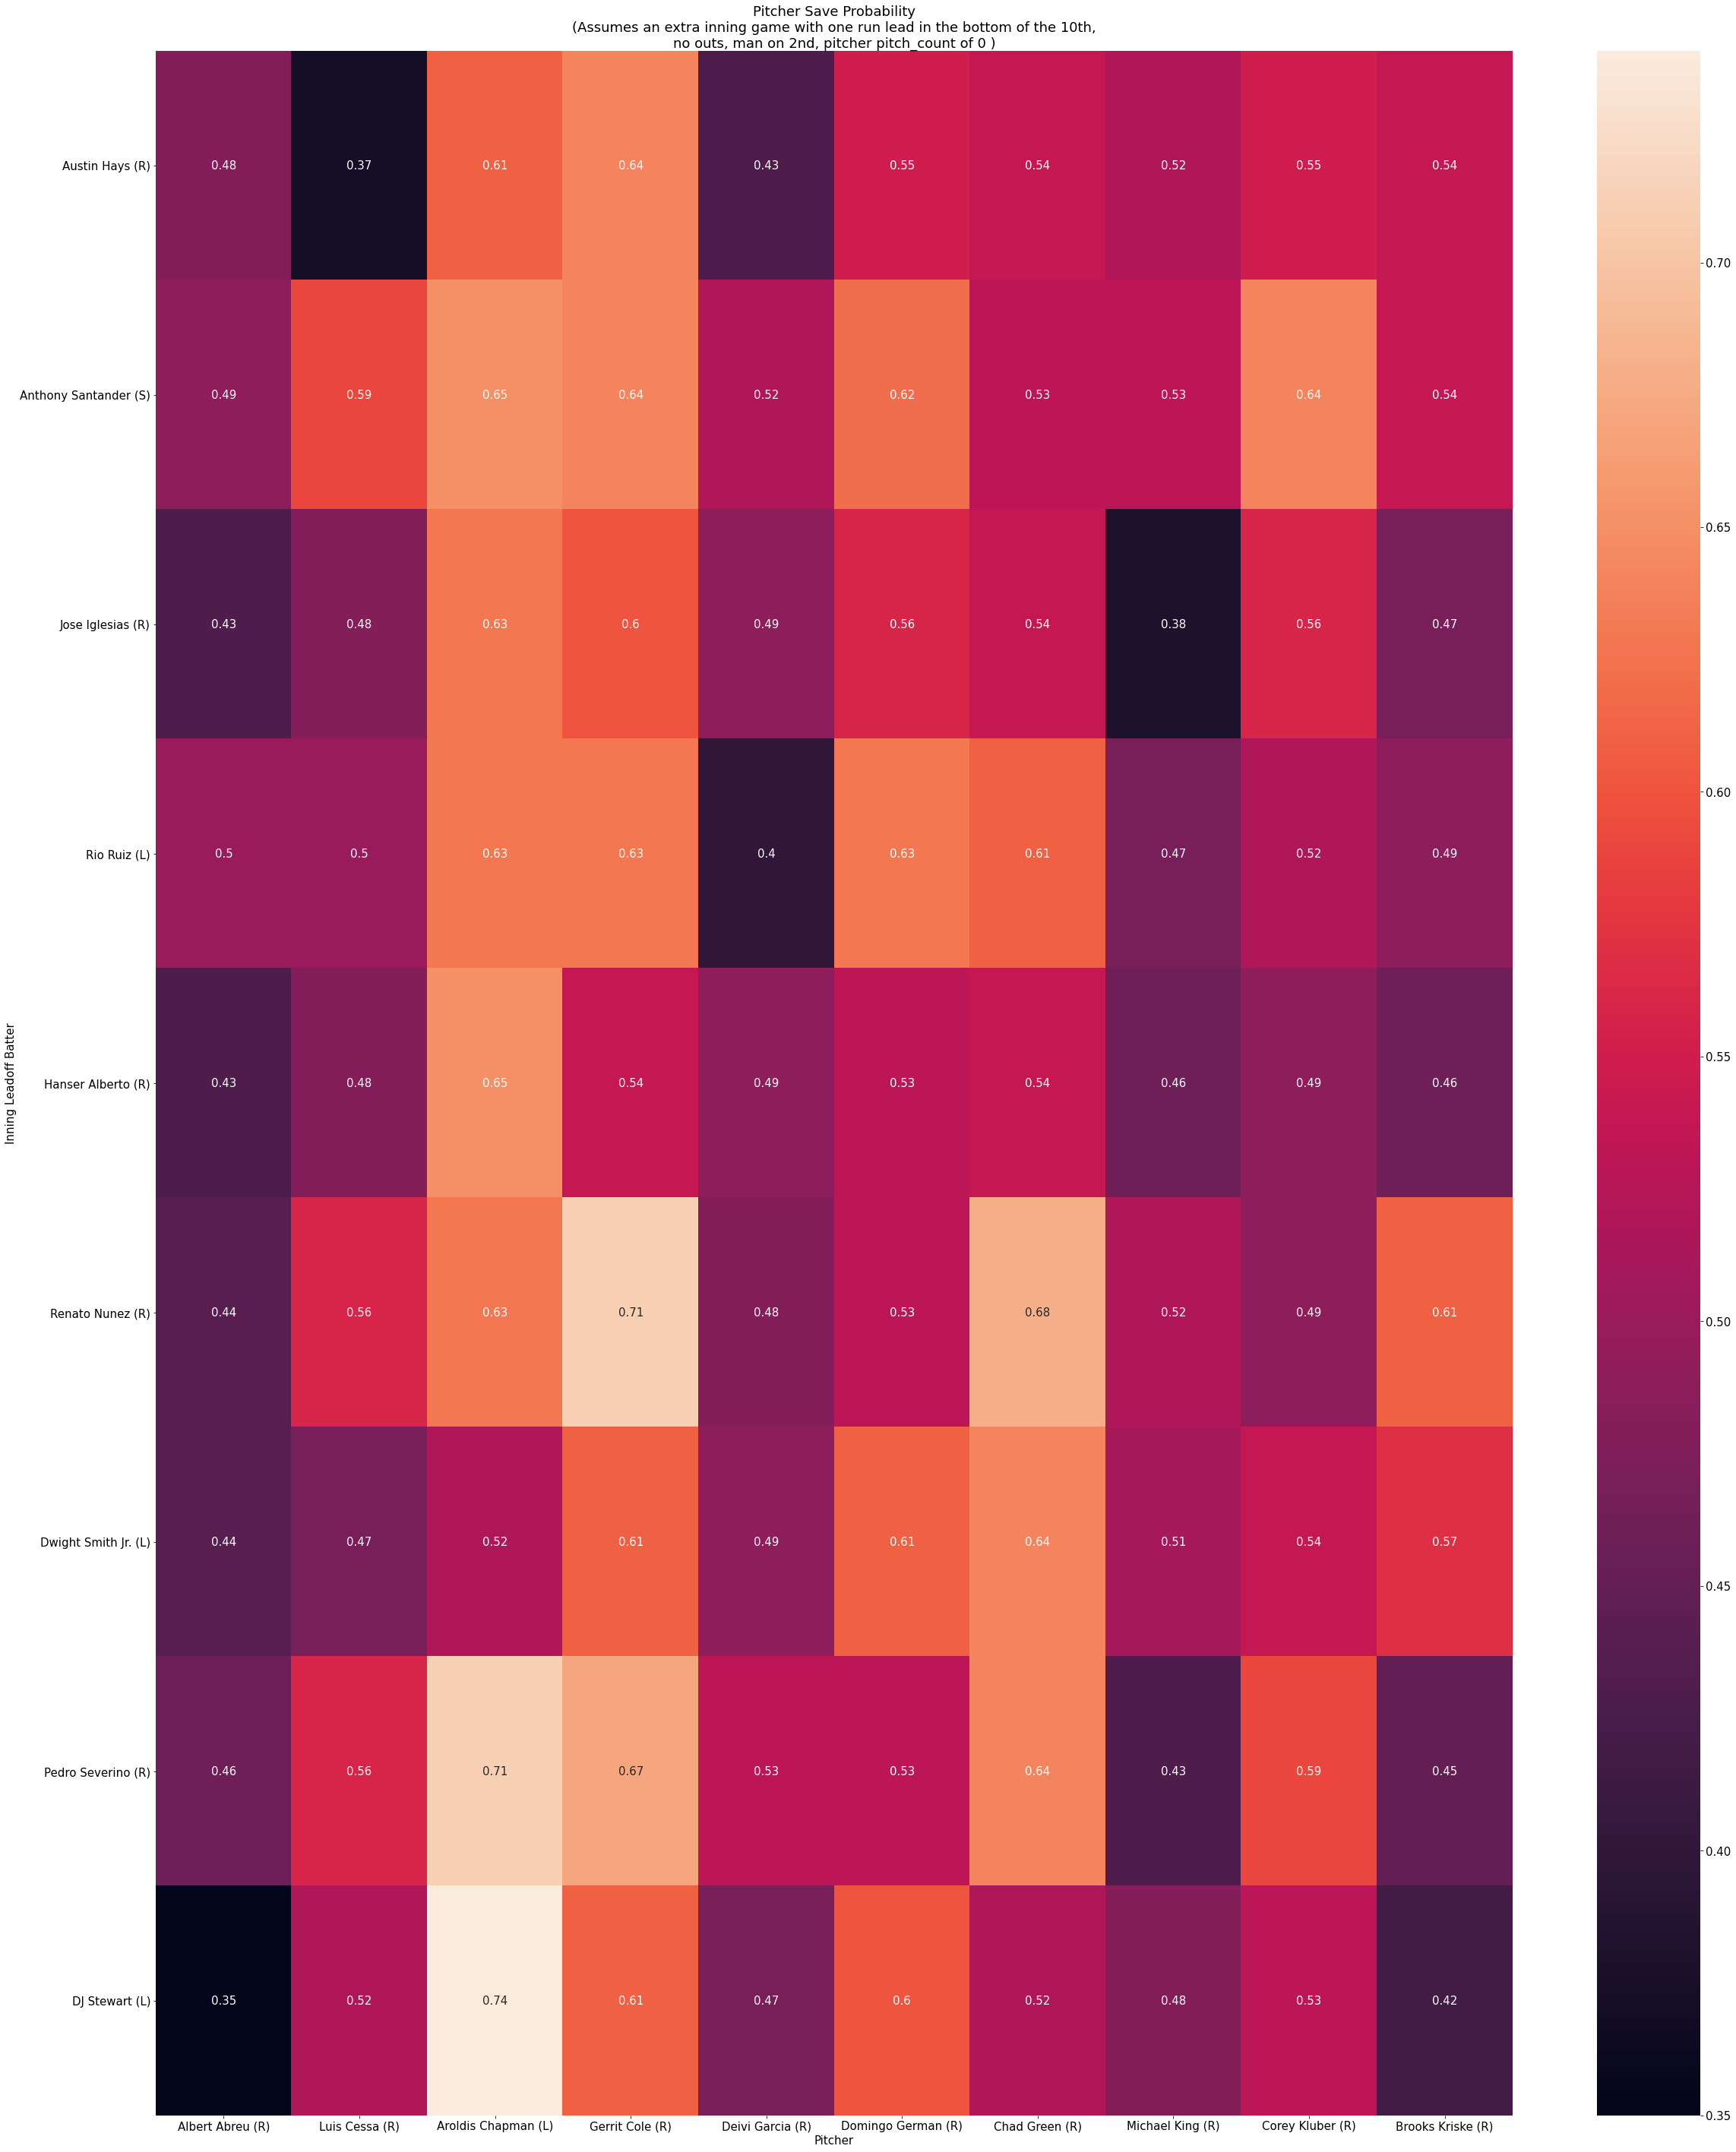

In [19]:
def find_best_reliever(pitchers, sims):
    print(f'\nFinding the best closer by simulating {sims} innings')
    home_lineup_positions = [
        LineupPos(player = sing.get_players(name = 'Austin Hays')[0], position = 'CF'),
        LineupPos(player = sing.get_players(name = 'Anthony Santander')[0], position = 'RF'),
        LineupPos(player = sing.get_players(name = 'Jose Iglesias')[0], position = 'SS'),
        LineupPos(player = sing.get_players(name = 'Rio Ruiz')[0], position = '3B'),
        LineupPos(player = sing.get_players(name = 'Hanser Alberto')[0], position = '2B'),
        LineupPos(player = sing.get_players(name = 'Renato Nunez')[0], position = '1B'),
        LineupPos(player = sing.get_players(name = 'Dwight Smith')[0], position = 'DH'),
        LineupPos(player = sing.get_players(name = 'Pedro Severino')[0], position = 'C'),
        LineupPos(player = sing.get_players(name = 'DJ Stewart')[0], position = 'CF'),
        LineupPos(player = sing.get_players(name = 'Tommy Milone')[0], position = 'P'),
    ]

    visit_lineup_positions = [
        LineupPos(player = sing.get_players(name = 'Yandy Diaz')[0], position = '3B'),
        LineupPos(player = sing.get_players(name = 'Jose Martinez')[0], position = '1B'),
        LineupPos(player = sing.get_players(name = 'Yoshi Tsutsugo')[0], position = 'DH'),
        LineupPos(player = sing.get_players(name = 'Hunter Renfroe')[0], position = 'RF'),
        LineupPos(player = sing.get_players(name = 'Manuel Margot')[0], position = 'LF'),
        LineupPos(player = sing.get_players(name = 'Mike Brosseau')[0], position = '3B'),
        LineupPos(player = sing.get_players(name = 'Willy Adames')[0], position = 'SS'),
        LineupPos(player = sing.get_players(name = 'Kevin Kiermaier')[0], position = 'CF'),
        LineupPos(player = sing.get_players(name = 'Mike Zunino')[0], position = 'C'),
        LineupPos(player = sing.get_players(name = 'Tyler Glasnow')[0], position = 'P'),
    ]

    B = pd.Index([f'{batter.player.full_name} ({batter.player.bat_side})' for batter in home_lineup_positions], name="rows")[0:9]
    P = pd.Index([f'{pitcher.full_name} ({pitcher.pitch_hand})' for pitcher in test_pitcher_list] , name="columns")
    home_lineup = Lineup(lineup = home_lineup_positions)
    df = pd.DataFrame('', index=B, columns=P)
    location = sing.get_venues(stadium_name='Oriole Park')[0]
    home_team = sing.get_teams(name = "Orioles")[0]
    #assume, visit team has one run lead in the bottom of the 10th inning.   Based on 2020 rules, home team starts with a runner on 2B and no one out
    bat_score_start = 2
    fld_score_start = 3 
    print("here")
    for bat_lineup_start in range(1, 10):  #loop through batters.    Skip last batter (pitcher) because of DH
        st = State(inning=10, top=False, on_1b=False, on_2b=True, on_3b=False, outs=0, bat_score=bat_score_start,
                   fld_score=fld_score_start, bat_lineup_order=bat_lineup_start)
        pitcher_count = 0
        for pitcher in pitchers:  #loop through pitchers
            pitcher_count = pitcher_count + 1   #track which pitcher we are using
            visit_lineup_positions[9] = LineupPos(player = sing.get_players(id = pitcher.mlb_id)[0], position = 'P')
            visit_lineup = Lineup(lineup = visit_lineup_positions)
            game = Game(visit_lineup = visit_lineup, home_lineup = home_lineup, atmosphere = Atmosphere(venue = location, home_team = home_team))

            #run the simulation.  it will return an array of GameSimResults
            game_sim_results = sing.get_game_sim({'game' : game, 'start_state' :  st},  num_sims = sims)

            saves = len([1 for r in game_sim_results  if (r.away_score > r.home_score)])
            losses = len([1 for r in game_sim_results  if (r.away_score < r.home_score)])
            ties = len([1 for r in game_sim_results  if (r.away_score == r.home_score)])
            print('Pitcher: {:<20s} Lineup Start: {} Save Percentage: {:.1f}% Loss Percentage: {:.1f}%  Tie Percentage: {:.1f}%'.format(pitcher.full_name, bat_lineup_start, 100*saves/sims
                ,100*losses/sims
                ,100*ties/sims))
            df.loc[B[bat_lineup_start - 1]][P[pitcher_count - 1]] = round(saves/sims, 3)
    for col in df.columns:
        df[col] = df[col].astype(float)
    return df


def plot_results(df):
    plt.figure(figsize=(40, 50))
    sns.heatmap(df, annot=True, fmt='g')
    plt.title('Pitcher Save Probability\n(Assumes an extra inning game with one run lead in the bottom of the 10th,\nno outs, man on 2nd, pitcher pitch_count of 0 )', wrap=True)
    plt.xlabel('Pitcher')
    plt.ylabel('Inning Leadoff Batter')
    plt.yticks(rotation=0)
    plt.show();


    
#get the first group of pitchers to use as candidate pitchers
test_pitcher_list = sing.get_players(team_name = 'Yankees', position = 'P', on_40 = True)[0:10]
print(f'Evaluating {len(test_pitcher_list)} pitchers')

results = find_best_reliever(test_pitcher_list, sims = 100)
plot_results(results)


    